In [74]:
import numpy as np
import pandas as pd
import IPython.display as ipd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
X = pd.read_csv('complete_unscaled_dataset2.csv', index_col = 0, header = [0])
#Fit e scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_scaled_df = pd.DataFrame(data=X_scaled, index = X.index, columns = X.columns)
X_scaled_df.index.name = 'track_id'

tracks_genres = pd.read_csv('tracks_genres_mio2.csv', index_col = 0, header = [0])
#Alcune tracce presenti in tracks_genres.csv potrebbero non funzionare, quindi tengo solo le tracce di cui sono riuscito ad estrarre le feature
y = tracks_genres.loc[X.index,  'genre']

df = X_scaled_df.join([y])


In [75]:
N = 2000

#df_subset = df.sample(n = N) 
df_subset = df

data_subset = df_subset.loc[:, df_subset.columns != 'genre']

ipd.display(data_subset)

,"('mfcc', 'mean', '1')","('mfcc', 'mean', '2')","('mfcc', 'mean', '3')","('mfcc', 'mean', '4')","('mfcc', 'mean', '5')","('mfcc', 'mean', '6')","('mfcc', 'mean', '7')","('mfcc', 'mean', '8')","('mfcc', 'mean', '9')","('mfcc', 'mean', '10')",...,"('contrast', 'skew', '3')","('contrast', 'skew', '4')","('contrast', 'skew', '5')","('contrast', 'skew', '6')","('contrast', 'kurtosis', '1')","('contrast', 'kurtosis', '2')","('contrast', 'kurtosis', '3')","('contrast', 'kurtosis', '4')","('contrast', 'kurtosis', '5')","('contrast', 'kurtosis', '6')"
track_id,,,,,,,,,,,,,,,,,,,,,
2,0.535158,-1.171439,-0.248598,-1.019045,-0.496287,0.103340,-0.045226,0.072373,-0.351597,-0.289402,...,-0.627822,-0.177535,-0.026641,0.531901,1.195547,-0.406195,-0.523502,-0.024201,-0.089331,-0.042509
3,0.231516,-0.960181,0.010757,0.160338,0.209890,0.354125,-0.328478,0.265190,-0.635641,0.592344,...,-0.306824,-0.559098,-1.256679,-0.326947,-0.422665,0.405803,-0.443444,-0.787090,-0.362740,-0.355483
5,0.146249,-0.568231,0.635512,-0.230519,-0.301917,0.383168,-0.465180,1.484604,-0.363195,-0.456816,...,-1.325519,-0.800487,-0.299789,0.834124,-0.422028,0.890926,-0.527493,0.549456,-0.043003,0.990012
10,1.032619,-0.371498,-1.718318,0.311953,-0.600178,-0.635522,-0.079029,-0.250375,-0.231001,-0.372466,...,-0.349881,-0.145565,-0.145922,-0.146471,1.090319,0.143880,-0.151572,0.665207,1.227543,0.125166
134,0.368808,-0.647093,0.076090,0.448483,0.188969,-0.046518,0.665180,1.772248,0.617269,1.103632,...,-0.108529,0.904798,0.153040,0.289432,2.585780,0.102094,-0.255650,0.403733,-0.096994,-0.236819
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155304,0.419022,-0.575552,0.681066,0.999145,0.124047,0.444907,1.363107,0.037376,-0.242993,0.264967,...,-0.661839,-1.594077,-1.201357,-0.112952,1.567916,0.129943,-0.236286,-0.094536,-0.443064,-0.569807
155305,-0.709507,0.691886,1.359166,0.403695,0.937591,-1.160162,0.242235,-0.982086,-1.633952,0.475092,...,-0.060556,-0.658192,-0.217259,0.441571,0.542492,-0.343194,0.830389,-0.256479,-0.431061,-0.171003
155306,-0.951883,1.480693,0.108587,0.341314,0.852379,-0.541922,0.745507,-0.967252,0.416183,-0.270824,...,-0.061906,-0.134405,0.244209,-0.579824,1.968558,0.252191,0.067952,-0.038699,-0.147595,0.140334


In [76]:
#SMOTE resampling
from imblearn.over_sampling import SMOTE, ADASYN
data_subset_resampled, y_resampled = SMOTE().fit_resample(data_subset, df_subset.loc[:, df_subset.columns == 'genre'])

#SVM SMOTE resampling
from imblearn.over_sampling import SVMSMOTE
data_subset_resampledSVM, y_resampledSVM = SVMSMOTE().fit_resample(data_subset, df_subset.loc[:, df_subset.columns == 'genre'])


In [77]:
#Faccio PCA su SMOTE
#from sklearn.decomposition import PCA
#pca_50 = PCA(n_components=50)
#pca_result_50 = pca_50.fit_transform(data_subset_resampled)
#print('Cumulative explained variation for 50 principal components: {}'.format(np.sum(pca_50.explained_variance_ratio_)))

#Faccio PCA su SVMSMOTE
#from sklearn.decomposition import PCA
#pca_50SVM = PCA(n_components=50)
#pca_result_50SVM = pca_50SVM.fit_transform(data_subset_resampledSVM)
#print('Cumulative explained variation for 50 principal components: {}'.format(np.sum(pca_50SVM.explained_variance_ratio_)))

In [78]:
#Faccio t-SNE
import time
from sklearn.manifold import TSNE
time_start = time.time()
tsne = TSNE(early_exaggeration = 30.0, n_components=2, verbose=1, perplexity=40, n_iter=1000)
tsne_pca_results = tsne.fit_transform(data_subset_resampled)
print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

#Faccio t-SNE su SVMSMOTE
import time
from sklearn.manifold import TSNE
time_startSVM = time.time()
tsneSVM = TSNE(early_exaggeration = 30.0, n_components=2, verbose=1, perplexity=40, n_iter=1000)
tsne_pca_resultsSVM = tsneSVM.fit_transform(data_subset_resampledSVM)
print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_startSVM))

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 56784 samples in 3.950s...
[t-SNE] Computed neighbors for 56784 samples in 1142.133s...
[t-SNE] Computed conditional probabilities for sample 1000 / 56784
[t-SNE] Computed conditional probabilities for sample 2000 / 56784
[t-SNE] Computed conditional probabilities for sample 3000 / 56784
[t-SNE] Computed conditional probabilities for sample 4000 / 56784
[t-SNE] Computed conditional probabilities for sample 5000 / 56784
[t-SNE] Computed conditional probabilities for sample 6000 / 56784
[t-SNE] Computed conditional probabilities for sample 7000 / 56784
[t-SNE] Computed conditional probabilities for sample 8000 / 56784
[t-SNE] Computed conditional probabilities for sample 9000 / 56784
[t-SNE] Computed conditional probabilities for sample 10000 / 56784
[t-SNE] Computed conditional probabilities for sample 11000 / 56784
[t-SNE] Computed conditional probabilities for sample 12000 / 56784
[t-SNE] Computed conditional probabilities for

[t-SNE] KL divergence after 250 iterations with early exaggeration: 304.757202
[t-SNE] KL divergence after 1000 iterations: 3.090419
t-SNE done! Time elapsed: 1529.2496831417084 seconds


In [79]:
original_samples = data_subset_resampled.iloc[:27789]
syntetical_samples = data_subset_resampled.iloc[27789:]


original_samples['resampling'] = 'Campioni originali'
syntetical_samples['resampling'] = 'Campioni sintetici'

all_samples = original_samples.append([syntetical_samples])
new_df_subset = all_samples.join([y_resampled])

ipd.display(new_df_subset)



########################
original_samplesSVM = data_subset_resampledSVM.iloc[:27789]
syntetical_samplesSVM = data_subset_resampledSVM.iloc[27789:]


original_samplesSVM['resampling'] = 'Campioni originali'
syntetical_samplesSVM['resampling'] = 'Campioni sintetici'

all_samplesSVM = original_samplesSVM.append([syntetical_samplesSVM])
new_df_subsetSVM = all_samplesSVM.join([y_resampledSVM])

ipd.display(new_df_subsetSVM)

<ipython-input-79-5a99addb1416>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  original_samples['resampling'] = 'Campioni originali'
<ipython-input-79-5a99addb1416>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  syntetical_samples['resampling'] = 'Campioni sintetici'


,"('mfcc', 'mean', '1')","('mfcc', 'mean', '2')","('mfcc', 'mean', '3')","('mfcc', 'mean', '4')","('mfcc', 'mean', '5')","('mfcc', 'mean', '6')","('mfcc', 'mean', '7')","('mfcc', 'mean', '8')","('mfcc', 'mean', '9')","('mfcc', 'mean', '10')",...,"('contrast', 'skew', '5')","('contrast', 'skew', '6')","('contrast', 'kurtosis', '1')","('contrast', 'kurtosis', '2')","('contrast', 'kurtosis', '3')","('contrast', 'kurtosis', '4')","('contrast', 'kurtosis', '5')","('contrast', 'kurtosis', '6')",resampling,genre
0,0.535158,-1.171439,-0.248598,-1.019045,-0.496287,0.103340,-0.045226,0.072373,-0.351597,-0.289402,...,-0.026641,0.531901,1.195547,-0.406195,-0.523502,-0.024201,-0.089331,-0.042509,Campioni originali,Hip-Hop
1,0.231516,-0.960181,0.010757,0.160338,0.209890,0.354125,-0.328478,0.265190,-0.635641,0.592344,...,-1.256679,-0.326947,-0.422665,0.405803,-0.443444,-0.787090,-0.362740,-0.355483,Campioni originali,Hip-Hop
2,0.146249,-0.568231,0.635512,-0.230519,-0.301917,0.383168,-0.465180,1.484604,-0.363195,-0.456816,...,-0.299789,0.834124,-0.422028,0.890926,-0.527493,0.549456,-0.043003,0.990012,Campioni originali,Hip-Hop
3,1.032619,-0.371498,-1.718318,0.311953,-0.600178,-0.635522,-0.079029,-0.250375,-0.231001,-0.372466,...,-0.145922,-0.146471,1.090319,0.143880,-0.151572,0.665207,1.227543,0.125166,Campioni originali,Pop
4,0.368808,-0.647093,0.076090,0.448483,0.188969,-0.046518,0.665180,1.772248,0.617269,1.103632,...,0.153040,0.289432,2.585780,0.102094,-0.255650,0.403733,-0.096994,-0.236819,Campioni originali,Hip-Hop
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56779,0.774384,0.055965,0.228495,-0.664046,0.163106,-0.282771,-0.072322,-1.089439,-1.071758,-0.295496,...,0.382389,0.458753,0.704082,-0.260022,-0.323132,-0.294818,-0.089917,0.179856,Campioni sintetici,Pop
56780,-1.348077,1.242332,1.510375,-0.053599,-0.001492,0.399102,1.578697,-1.204232,-0.353564,-0.780272,...,-1.144202,-0.697943,-0.199238,-0.152486,-0.291845,-0.519292,-0.372418,-0.817705,Campioni sintetici,Pop
56781,-0.941386,0.507230,1.302616,0.529050,0.891406,0.752547,1.506250,0.988205,0.301965,0.453542,...,-1.323413,0.581149,0.107914,-0.402244,-0.136380,-0.269493,-0.709521,-0.171255,Campioni sintetici,Pop
56782,0.973547,-0.176308,-0.041018,-0.558219,-0.410757,0.262091,-0.312810,-0.265252,-0.177715,0.014390,...,0.020487,0.513123,-0.183277,0.405929,-0.115630,0.164810,-0.145883,0.213832,Campioni sintetici,Pop


<ipython-input-79-5a99addb1416>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  original_samplesSVM['resampling'] = 'Campioni originali'
<ipython-input-79-5a99addb1416>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  syntetical_samplesSVM['resampling'] = 'Campioni sintetici'


,"('mfcc', 'mean', '1')","('mfcc', 'mean', '2')","('mfcc', 'mean', '3')","('mfcc', 'mean', '4')","('mfcc', 'mean', '5')","('mfcc', 'mean', '6')","('mfcc', 'mean', '7')","('mfcc', 'mean', '8')","('mfcc', 'mean', '9')","('mfcc', 'mean', '10')",...,"('contrast', 'skew', '5')","('contrast', 'skew', '6')","('contrast', 'kurtosis', '1')","('contrast', 'kurtosis', '2')","('contrast', 'kurtosis', '3')","('contrast', 'kurtosis', '4')","('contrast', 'kurtosis', '5')","('contrast', 'kurtosis', '6')",resampling,genre
0,0.535158,-1.171439,-0.248598,-1.019045,-0.496287,0.103340,-0.045226,0.072373,-0.351597,-0.289402,...,-0.026641,0.531901,1.195547,-0.406195,-0.523502,-0.024201,-0.089331,-0.042509,Campioni originali,Hip-Hop
1,0.231516,-0.960181,0.010757,0.160338,0.209890,0.354125,-0.328478,0.265190,-0.635641,0.592344,...,-1.256679,-0.326947,-0.422665,0.405803,-0.443444,-0.787090,-0.362740,-0.355483,Campioni originali,Hip-Hop
2,0.146249,-0.568231,0.635512,-0.230519,-0.301917,0.383168,-0.465180,1.484604,-0.363195,-0.456816,...,-0.299789,0.834124,-0.422028,0.890926,-0.527493,0.549456,-0.043003,0.990012,Campioni originali,Hip-Hop
3,1.032619,-0.371498,-1.718318,0.311953,-0.600178,-0.635522,-0.079029,-0.250375,-0.231001,-0.372466,...,-0.145922,-0.146471,1.090319,0.143880,-0.151572,0.665207,1.227543,0.125166,Campioni originali,Pop
4,0.368808,-0.647093,0.076090,0.448483,0.188969,-0.046518,0.665180,1.772248,0.617269,1.103632,...,0.153040,0.289432,2.585780,0.102094,-0.255650,0.403733,-0.096994,-0.236819,Campioni originali,Hip-Hop
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56779,0.487501,-0.163070,-1.519765,1.811841,-1.008363,0.659898,0.651354,0.244980,0.815401,0.759615,...,-0.500005,-0.403858,0.365132,0.997697,2.101112,0.805891,-0.337234,-0.498116,Campioni sintetici,Pop
56780,-0.289503,1.367879,0.798169,-1.465102,1.435562,-0.774280,0.168994,-0.636626,0.527609,0.657151,...,-0.011158,1.349302,0.083052,-0.049289,-0.282000,-0.098483,-0.441883,0.173296,Campioni sintetici,Pop
56781,-1.623221,-0.562744,0.075619,-1.152104,-1.341965,-0.578044,-0.918761,-0.783393,-1.828256,-0.766532,...,-1.338197,-0.878336,-0.187590,0.051843,-0.246823,-0.435342,-0.873927,-0.819212,Campioni sintetici,Pop
56782,0.194321,0.659093,0.547733,0.344201,-0.343952,-0.648740,-0.031759,-1.726219,0.035037,-0.140228,...,0.206946,0.449094,-0.144048,-0.275625,0.182990,0.101674,-0.452675,-0.543757,Campioni sintetici,Pop


<AxesSubplot:title={'center':'Con oversampling SVM SMOTE'}, xlabel='X in t-SNE', ylabel='Y in t_SNE'>

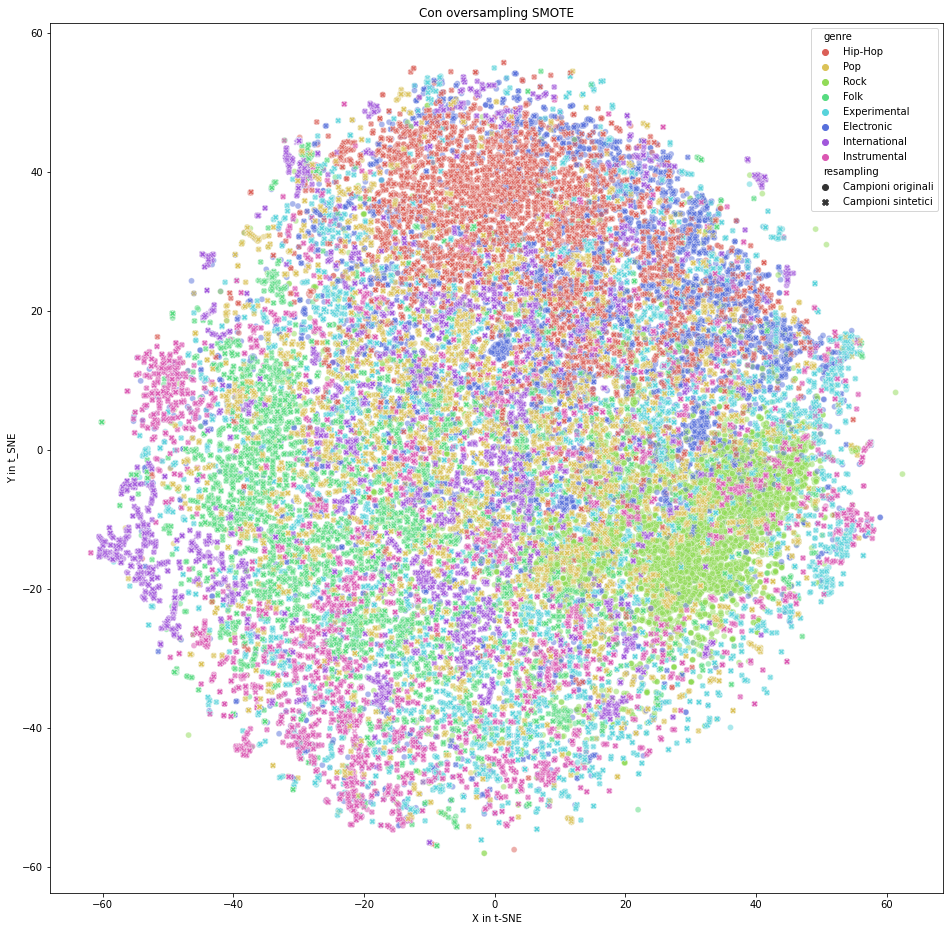

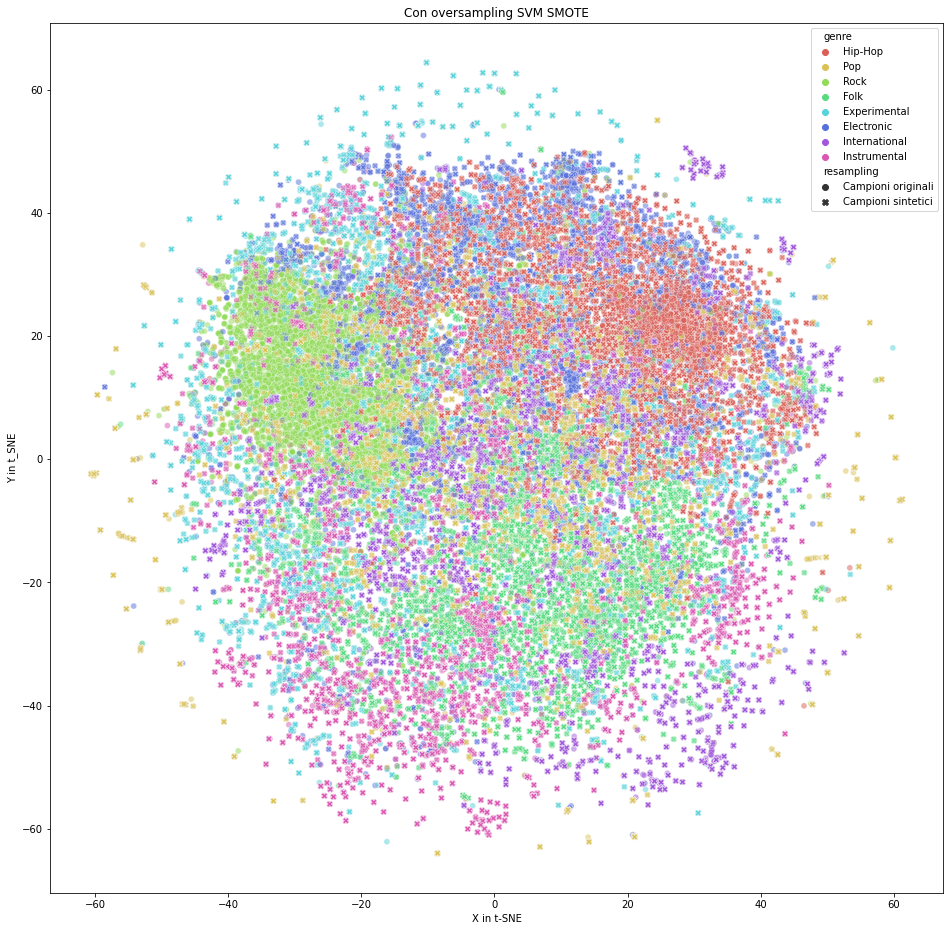

In [82]:
import matplotlib.pyplot  as plt
import seaborn as sns

new_df_subset['X in t-SNE'] = tsne_pca_results[:,0]
new_df_subset['Y in t_SNE'] = tsne_pca_results[:,1]
plt.figure(figsize=(16,16))
plt.title('Con oversampling SMOTE')

sns.scatterplot(
    x="X in t-SNE", y="Y in t_SNE",
    hue="genre",
    palette=sns.color_palette("hls", 8),
    data=new_df_subset,
    legend="full",
    style="resampling",
    alpha=0.5,
)

###############
new_df_subsetSVM['X in t-SNE'] = tsne_pca_resultsSVM[:,0]
new_df_subsetSVM['Y in t_SNE'] = tsne_pca_resultsSVM[:,1]
plt.figure(figsize=(16,16))
plt.title('Con oversampling SVM SMOTE')

sns.scatterplot(
    x="X in t-SNE", y="Y in t_SNE",
    hue="genre",
    palette=sns.color_palette("hls", 8),
    data=new_df_subsetSVM,
    legend="full",
    style="resampling",
    alpha=0.5,
)

Cumulative explained variation for 50 principal components: 0.8522692734345124
t-SNE done! Time elapsed: 3.4728760719299316 seconds


<AxesSubplot:title={'center':'Solo campioni originali'}, xlabel='X in t-SNE', ylabel='Y in t_SNE'>

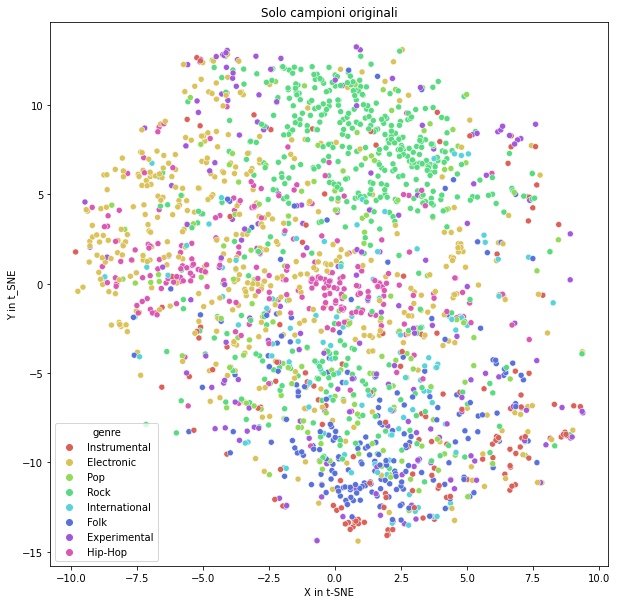

In [73]:
#Faccio PCA
from sklearn.decomposition import PCA
pca_50ORIGINALI = PCA(n_components=50)
pca_result_50ORIGINALI = pca_50ORIGINALI.fit_transform(data_subset_resampledSVM.iloc[:2000])
print('Cumulative explained variation for 50 principal components: {}'.format(np.sum(pca_50ORIGINALI.explained_variance_ratio_)))

#Faccio t-SNE
import time
from sklearn.manifold import TSNE
time_startORIGINALI = time.time()
tsneORIGINALI = TSNE(n_components=2, verbose=0, perplexity=40, n_iter=300)
tsne_pca_resultsORIGINALI = tsneORIGINALI.fit_transform(pca_result_50ORIGINALI)
print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_startORIGINALI))

###############
df_subsetORIGINALI = df_subset
df_subsetORIGINALI['X in t-SNE'] = tsne_pca_resultsORIGINALI[:,0]
df_subsetORIGINALI['Y in t_SNE'] = tsne_pca_resultsORIGINALI[:,1]
plt.figure(figsize=(10,10))
plt.title('Solo campioni originali')

sns.scatterplot(
    x="X in t-SNE", y="Y in t_SNE",
    hue="genre",
    palette=sns.color_palette("hls", 8),
    data=df_subsetORIGINALI,
    legend="full",
    alpha=0.99,
)